<a href="https://colab.research.google.com/github/Srinivash333/ML-2025-2026/blob/main/Binary_logistic_regression0and1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Count of digits in filtered dataset:
Digit 0: 6903
Digit 1: 7877

Test Accuracy: 99.97%


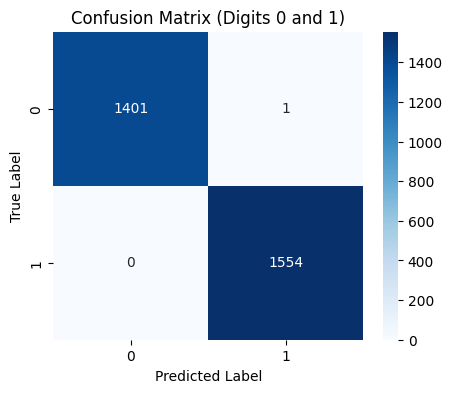

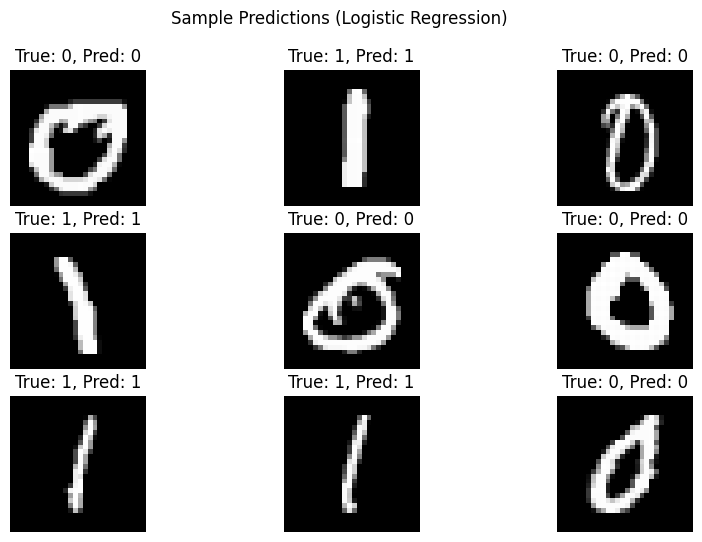

In [5]:
# MNIST Binary Classification (Digits 0 and 1) using Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import seaborn as sns

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine train and test to get all 70,000 samples
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

# 2. Filter digits 0 and 1 only
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# ✅ Count number of 0s and 1s in dataset
unique, counts = np.unique(y, return_counts=True)
count_dict = dict(zip(unique, counts))
print("\nCount of digits in filtered dataset:")
for digit, count in count_dict.items():
    print(f"Digit {digit}: {count}")

# 3. Flatten 28x28 images to 784 features and normalize
X = X.reshape(X.shape[0], -1) / 255.0

# 4. Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 5. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Predict
y_pred = model.predict(X_test)

# 7. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix (Digits 0 and 1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Show some predictions
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions (Logistic Regression)")
plt.show()
